https://www.dataquest.io/blog/programming-best-practices-for-data-science/

In this notebook we review 
https://en.wikipedia.org/wiki/Benford%27s_law

In [1]:
import pandas as pd
print('Pandas version',pd.__version__)

Pandas version 1.2.4


In [2]:
import matplotlib.pylab as plt

In [3]:
pd.options.display.max_rows = 999

data sourceE: https://www.lendingclub.com/info/download-data.action

In [4]:
loans_2007 = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/LoanStats3a.csv', skiprows=1, low_memory=False)
loans_2007.shape

(42538, 145)

In [5]:
loans_2007.head(6).T

,0,1,2,3,4,5
id,NaN,NaN,NaN,NaN,NaN,NaN
member_id,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,5000.0,2500.0,2400.0,10000.0,3000.0,5000.0
funded_amnt,5000.0,2500.0,2400.0,10000.0,3000.0,5000.0
funded_amnt_inv,4975.0,2500.0,2400.0,10000.0,3000.0,5000.0
term,36 months,60 months,36 months,36 months,60 months,36 months
int_rate,10.65%,15.27%,15.96%,13.49%,12.69%,7.90%
installment,162.87,59.83,84.33,339.31,67.79,156.46
grade,B,C,C,C,B,A
sub_grade,B2,C4,C5,C1,B5,A4


## Empty columns

Drop columns that are not useful

In [6]:
loans_2007 = loans_2007.drop(['desc', 'url'],axis=1)

For each column, what is the ratio of rows with missing entries to total row count?

--> conclusion: many rows contain all empty entries.

How many rows constitutes 10% of the size?

In [7]:
tenth_count = int(len(loans_2007)/10.0)
tenth_count

4253

If the percentage of empty rows per column exceeds 70% (an arbitrarily chosen value), drop the column

In [8]:
loans_2007 = loans_2007.dropna(thresh=tenth_count*7, axis=1)
loans_2007.shape

(42538, 53)

## Are there columns where all rows have the same value?

In [9]:
for this_column in loans_2007.columns:
    if (loans_2007[this_column].nunique()==1):
        print(this_column)

pymnt_plan
initial_list_status
out_prncp
out_prncp_inv
collections_12_mths_ex_med
policy_code
application_type
chargeoff_within_12_mths
hardship_flag
disbursement_method


These columns probably aren't going to yield much useful information

<BR>
<BR>

Recall the unique entry count tool we developed earlier in the semester:

In [10]:
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().head(count))

In [11]:
uniq_per_col(loans_2007,5)

====  loan_amnt has 898 unique entries ====
10000.0    3016
12000.0    2439
5000.0     2260
6000.0     2037
15000.0    2012
Name: loan_amnt, dtype: int64
====  funded_amnt has 1051 unique entries ====
10000.0    2924
12000.0    2347
5000.0     2247
6000.0     2023
15000.0    1897
Name: funded_amnt, dtype: int64
====  funded_amnt_inv has 9248 unique entries ====
5000.0     1369
10000.0    1302
6000.0     1240
12000.0    1084
8000.0      929
Name: funded_amnt_inv, dtype: int64
====  term has 2 unique entries ====
 36 months    31534
 60 months    11001
Name: term, dtype: int64
====  int_rate has 394 unique entries ====
 10.99%    970
 11.49%    837
 13.49%    832
  7.51%    787
  7.88%    742
Name: int_rate, dtype: int64
====  installment has 16459 unique entries ====
311.11    68
180.96    59
311.02    54
150.80    48
368.45    46
Name: installment, dtype: int64
====  grade has 7 unique entries ====
B    12389
A    10183
C     8740
D     6016
E     3394
Name: grade, dtype: int64
====  s

In [12]:
first_digit_list=[]
for this_amt in list(loans_2007['loan_amnt']):
    first_digit_list.append(str(this_amt)[0])

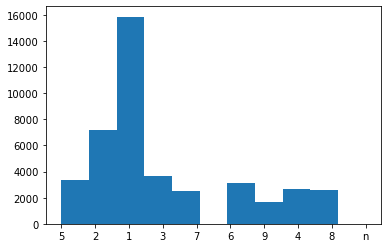

In [13]:
_=plt.hist(first_digit_list,bins=11)